In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize, StandardScaler, OneHotEncoder, LabelEncoder

In [2]:
df = pd.DataFrame({"nome": ['Peter', 'Bruce', "T'Challa"], "simbolo": ['aranha', 'morcego', 'pantera'], "idade": [22, pd.NaT, 25]})

In [3]:
df

,nome,simbolo,idade
0,Peter,aranha,22
1,Bruce,morcego,NaT
2,T'Challa,pantera,25


In [4]:
df.dropna()

,nome,simbolo,idade
0,Peter,aranha,22
2,T'Challa,pantera,25


# RMSE

In [20]:
# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

In [21]:
diferencas = []

for r, p in zip(reais, prev):
    diferencas.append((r - p))

diferencas

[5000, 8000, -10000, 5000, -15000]

In [22]:
diferencas = [r - p for r, p in zip(reais, prev)]
diferencas

[5000, 8000, -10000, 5000, -15000]

In [23]:
quadrado_das_diferencas = [d ** 2 for d in diferencas]
quadrado_das_diferencas

[25000000, 64000000, 100000000, 25000000, 225000000]

In [24]:
mse = np.mean(quadrado_das_diferencas)
mse

np.float64(87800000.0)

In [25]:
rmse = np.sqrt(mse)
rmse

np.float64(9370.165420097983)

# Código para o cálculo do RMSE com Scikit-Learn

In [17]:
# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

In [26]:
mse = mean_squared_error(reais, prev)
mse

87800000.0

In [27]:
rmse = np.sqrt(mse)
rmse

np.float64(9370.165420097983)

# Cálculo do MAPE (Mean Absolute Percentage Error) - Erro Percentual Absoluto Médio

In [40]:
# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

In [28]:
erro_absoluto_percentual = []

for r, p in zip(reais, prev):
    erro_absoluto_percentual.append(abs((r - p) / r))

erro_absoluto_percentual

[0.05, 0.05333333333333334, 0.05, 0.02, 0.05]

In [31]:
mape = (sum(erro_absoluto_percentual) / len(erro_absoluto_percentual)) * 100
mape

4.466666666666668

In [41]:
# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

# Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

In [42]:
mape = mean_absolute_percentage_error(reais, prev)
mape

0.04466666666666667

# Imputação de valores faltantes

In [45]:
dados = np.array([[1, 2, 3, np.nan],
                  [4, np.nan, 6, 7],
                  [8, 9, 10, 11]])
dados

array([[ 1.,  2.,  3., nan],
       [ 4., nan,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [49]:
imputador = SimpleImputer(strategy='mean')
dados_imputados = imputador.fit_transform(dados)
dados_imputados

array([[ 1. ,  2. ,  3. ,  9. ],
       [ 4. ,  5.5,  6. ,  7. ],
       [ 8. ,  9. , 10. , 11. ]])

In [50]:
imputador = SimpleImputer(strategy='most_frequent')
dados_imputados = imputador.fit_transform(dados)
dados_imputados

array([[ 1.,  2.,  3.,  7.],
       [ 4.,  2.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

# Identificação de Outliers

In [52]:
dados = np.array([1,2,3,4,5,100])
dados

array([  1,   2,   3,   4,   5, 100])

In [64]:
q1 = np.percentile(dados, 25)
q1

np.float64(2.25)

In [65]:
q3 = np.percentile(dados, 75)
q3

np.float64(4.75)

In [66]:
iqr = q3 - q1
iqr

np.float64(2.5)

In [68]:
# Limite inferior e superior
limite_inf = q1 - 1.5 * iqr
limite_sup = q3 + 1.5 * iqr

In [69]:
limite_inf, limite_sup

(np.float64(-1.5), np.float64(8.5))

In [70]:
outliers = np.where((dados < limite_inf) | (dados > limite_sup))
outliers

(array([5]),)

In [71]:
dados[outliers[0]]

array([100])

# Remoção de Outliers

In [72]:
np.delete(dados, 5)

array([1, 2, 3, 4, 5])

# Normalização dos dados em uma lista

In [74]:
dados = np.array([2,3,5,6,7,4,8,7,6,0])
dados

array([2, 3, 5, 6, 7, 4, 8, 7, 6, 0])

In [76]:
dados_normalizados = normalize([dados], norm='max')
dados_normalizados

array([[0.25 , 0.375, 0.625, 0.75 , 0.875, 0.5  , 1.   , 0.875, 0.75 ,
        0.   ]])

# Padronização dos dados

In [80]:
dados = np.array([[1,2,3], [4,5,6], [7,8,9]])
dados

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [81]:
padronizador = StandardScaler()
dados_padronizados = padronizador.fit_transform(dados)
dados_padronizados

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

# Codificação com one-hot enconding e label enconding

In [83]:
dados_categoricos = np.array(['A', 'B', 'C', 'A', 'B'])
dados_categoricos

array(['A', 'B', 'C', 'A', 'B'], dtype='<U1')

In [86]:
codifc_one_hot = OneHotEncoder()
dados_one_hot = codifc_one_hot.fit_transform((dados_categoricos.reshape(-1,1)))
dados_one_hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (5, 3)>

In [87]:
print(f"Dados one-hot enconding: \n{dados_one_hot.toarray()}")

Dados one-hot enconding: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [88]:
dados_categoricos = np.array(['A', 'B', 'C', 'A', 'B'])
dados_categoricos

array(['A', 'B', 'C', 'A', 'B'], dtype='<U1')

In [91]:
codificador_label = LabelEncoder()
dados_label = codificador_label.fit_transform(dados_categoricos)
dados_label

array([0, 1, 2, 0, 1])

# Cálculo das métricas de acurácia, previsão, revocação e f1-score

In [93]:
total = 1000
vp = 150
vn = 700
fp = 50
fn = 50

# Acurácia

In [94]:
acuracia = vp / total
acuracia

0.15

# Precisão

In [95]:
precisao = vp / (vp + fp)
precisao

0.75

# Revocação

In [96]:
revocacao = vp / (vp + fn)
revocacao

0.75

# F1-Score

In [110]:
f1_score_temp = 2 * (precisao * revocacao) / (precisao + revocacao)
f1_score_temp

0.75

In [103]:
y_real = [1,0,1,0]
y_pred = [0,1,1,1]

In [112]:
# Métricas de avaliação
print(f'Acurácia: {accuracy_score(y_real, y_pred)})')
print(f'Precisão: {precision_score(y_real, y_pred)})')
print(f'Revocação: {recall_score(y_real, y_pred)})')
print(f'F1-Score: {f1_score(y_real, y_pred)})')

Acurácia: 0.25)
Precisão: 0.3333333333333333)
Revocação: 0.5)
F1-Score: 0.4)


In [116]:
target_names = ['class 0', 'class 1']
print(classification_report(y_real, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         2
     class 1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



# Matriz de Confusão

In [118]:
y_real_animais = ['cachorro', 'gato', 'cachorro', 'gato']
y_pred_animais = ['gato', 'cachorro', 'cachorro', 'cachorro']

In [119]:
confusion_matrix(y_real_animais, y_pred_animais)

array([[1, 1],
       [2, 0]])

* ([[VP FN] )
*  [FP VN]])

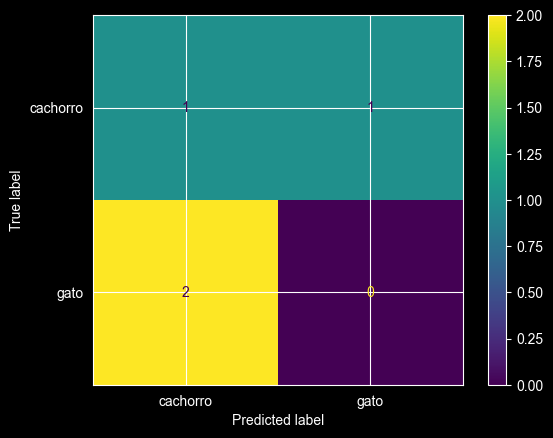

In [122]:
cm = confusion_matrix(y_real_animais, y_pred_animais, labels=['cachorro', 'gato'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cachorro', 'gato'])
disp.plot()
plt.show()